# Question 1 : Classification Problem

#### Read all the picts via PIL packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# you can choose one of the following package for image reading/processing
#import cv2
import PIL
Data = list()
Path = os.getcwd()
Path += '\\Desktop\\ML\\HW2\\EMNIST' # Find the path
for i in os.listdir(Path):
    temp = Path
    temp += '\\'
    temp += i
    for obj in os.listdir(temp):
        Temp = temp
        Temp += '\\'
        Temp += obj
        ### Here I print all the path of the jpg files in my pc.
        IM = PIL.Image.open(Temp)
        Data.append(IM.load())
del IM, Temp, temp, Path
print('Data Reading is done')
#C:\Users\User\Desktop\ML\HW2\EMNIST\a

Data Reading is done


#### Transform the data into RGB form

In [2]:
data = list()
for index in range(len(Data)):
    Temp = list()
    for i in range(28):
        temp = list()
        for j in range(28):
            temp.append(Data[index][i, j])
        Temp.append(temp)
    data.append(np.array(Temp).T)

In [3]:
### Make dataframe display all the rows and columns
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

#### Check the RBG is correct or not

In [4]:
### Check one the example of the data
example = data[1] # np.random.randint(0, len(data))
Example = pd.DataFrame(example)
PI = PIL.Image.fromarray(example)
PI.show()

In [5]:
Data = np.array(data).reshape(1024, 28*28)
Train = np.random.choice([i for i in range(0, 128)], size = (int(128 - 32)), replace = False)
Test = np.array(list(set([i for i in range(0, 128)]).difference(set(Train))))

In [6]:
Training = np.array([[-1 for i in range(784)]])
Testing = np.array([[-1 for i in range(784)]])
Train_Label = list()
Test_Label = list()
for i in range(8):
    Temp_Train = [i for j in range((int(128 - 32)))]
    Temp_Test = [i for j in range((128 - len(Temp_Train)))]
    Train_Label += Temp_Train
    Test_Label += Temp_Test
    Training = np.concatenate((Training, Data[Train + (i*(128))]))
    Testing = np.concatenate((Testing, Data[Test + (i*(128))]))
Training = Training[1:]
Ones1 = np.ones(shape = (Training.shape[0]))
Testing = Testing[1:]
Ones2 = np.ones(shape = (Testing.shape[0]))
#Training = np.insert(Training, 0, values = Ones1, axis = 1)
#Testing = np.insert(Testing, 0 , values = Ones2, axis = 1)
Train_Label = np.array(Train_Label)
Test_Label = np.array(Test_Label)
Training = Training/255
Testing = Testing/255
print(Training.shape)

(768, 784)


In [7]:
Train_label = np.zeros(shape = (Training.shape[0], 8))
for i in range(Training.shape[0]):
    Train_label[i, Train_Label[i]] = 1
Test_label = np.zeros(shape = (Testing.shape[0], 8))
for i in range(Testing.shape[0]):
    Test_label[i, Test_Label[i]] = 1

# ----------------------------------------------------------------------------------------- 

## Part 1 : Implement Least Squares for Classification and  Show the Classification Accuracy and Loss Value of Training and Test Data

In [8]:
coef = np.linalg.pinv(Training.T@Training)@Training.T@Train_label

In [9]:
def metric(label, label_predict):
    result = np.zeros(shape = (label.shape[0], 8))
    C = 0
    for i in range(label.shape[0]):
        result[i, np.argmax(label_predict, axis = 1)[i]] = 1
        if np.argmax(result[i]) == np.argmax(label[i]):
            C += 1
    return C/(label.shape[0])

### Print the accuracy and loss

In [10]:
def MSE(y, y_hat):
    return np.mean((y - y_hat)**2, axis = 1)

In [11]:
print('Training_ACC :', metric(Train_label, Training@coef), '\nTesting_ACC : ', metric(Test_label, Testing@coef))

Training_ACC : 1.0 
Testing_ACC :  0.28125


In [12]:
print('Training_Loss :', np.mean(MSE(Train_label, Training@coef)**(1/2)), '\nTesting_Loss : ', np.mean(MSE(Test_label, Testing@coef)**(1/2)))

Training_Loss : 0.07414278960046757 
Testing_Loss :  1.6103480094468092


# -----------------------------------------------------------------------------------------

## Part 2 (with (a), (b)) : Implement Logistic Regression Using BGD, MBGD and SGD

### Under each gradient descent method, I show the learning curve of loss and accuracy as well

### At the end of each code, I also print the final loss and accuracy

In [13]:
Training = np.array([[-1 for i in range(784)]])
Testing = np.array([[-1 for i in range(784)]])
Train_Label = list()
Test_Label = list()
for i in range(8):
    Temp_Train = [i for j in range((int(128 - 32)))]
    Temp_Test = [i for j in range((128 - len(Temp_Train)))]
    Train_Label += Temp_Train
    Test_Label += Temp_Test
    Training = np.concatenate((Training, Data[Train + (i*(128))]))
    Testing = np.concatenate((Testing, Data[Test + (i*(128))]))
Training = Training[1:]
Ones1 = np.ones(shape = (Training.shape[0]))
Testing = Testing[1:]
Ones2 = np.ones(shape = (Testing.shape[0]))
#Training = np.insert(Training, 0, values = Ones1, axis = 1)
#Testing = np.insert(Testing, 0 , values = Ones2, axis = 1)
Train_Label = np.array(Train_Label)
Test_Label = np.array(Test_Label)
Training = Training/255
Testing = Testing/255

In [14]:
Train_label = np.zeros(shape = (Training.shape[0], 8))
for i in range(Training.shape[0]):
    Train_label[i, Train_Label[i]] = 1
Test_label = np.zeros(shape = (Testing.shape[0], 8))
for i in range(Testing.shape[0]):
    Test_label[i, Test_Label[i]] = 1

In [15]:
def softmax(weights, Class, data):
    A = np.exp(weights[Class]@data.T) #  (8, 784)*(784, 768) = (8, 768)
    B = np.sum(np.exp(weights@data.T), axis = 0) # (8, 785)*(785, 768) = (8, 768) -> 1
    return A/B

In [16]:
def cross_entropy(t, y_hat):
    return (-1)*np.sum(t*np.log(y_hat))/len(t)

def loss(w,X):
    l =0
    for i in range(len(X)):
        l += cross_entropy(Y[i],softmax(w, X[i]))
    return l/len(X)

def acc(Y, Y_hat):
    count = 0
    for i in range(len(Y)):
        if np.where(Y[i]==1)[0] == np.argmax(Y_hat[i]):
            count += 1
    return count/len(Y)

#### The gradient function is the form below:

In [17]:
def gradient(data, predict, label):
    return data.T@(label - predict)/label.shape[0] # (785, 768)*(768, 1)  = (785, 1)

#### 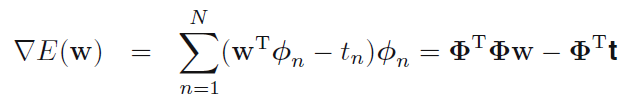

In [18]:
def Classify(data, weights):
    flag = 0
    for i in range(8):
        if flag:
            Temp = softmax(weights, i,data) #(768, 785)*(785, 1)
            Target = np.ones(shape = (temp.shape[0]))*i
            target = ((Temp > temp)*1)*Target + ((Temp <= temp)*1)*target
            temp = ((Temp > temp)*1)*Temp + ((Temp <= temp)*1)*temp
        else:
            temp = softmax(weights, i,data)
            target = np.zeros(shape = (temp.shape[0]))
            flag = 1
    return temp, target

In [19]:
def LOSS(data, weights, label):
    result = np.ones(shape = (data.shape[0]))
    for i in range(data.shape[0]):
        result[i] = (-1)*np.log(softmax(weights, label[i], data))[i]
    return np.mean(result)

### (1) Batch Gradient Descent

Epoch : 0  Train_Loss: 2.068173945486174 ---Test_Loss: 2.068991507646899
Epoch : 1  Train_Loss: 2.0571542004093053 ---Test_Loss: 2.0587859734652514
Epoch : 2  Train_Loss: 2.046361888837468 ---Test_Loss: 2.048805030342888
Epoch : 3  Train_Loss: 2.0357790182249627 ---Test_Loss: 2.0390310585920606
Epoch : 4  Train_Loss: 2.025389735276029 ---Test_Loss: 2.0294484642133526
Epoch : 5  Train_Loss: 2.0151800732527083 ---Test_Loss: 2.0200434455594443
Epoch : 6  Train_Loss: 2.005137728011438 ---Test_Loss: 2.010803786083284
Epoch : 7  Train_Loss: 1.9952518592354334 ---Test_Loss: 2.0017186699713614
Epoch : 8  Train_Loss: 1.9855129139567083 ---Test_Loss: 1.9927785180397262
Epoch : 9  Train_Loss: 1.975912469920626 ---Test_Loss: 1.9839748416911476
Epoch : 10  Train_Loss: 1.9664430966869606 ---Test_Loss: 1.9753001130427041
Epoch : 11  Train_Loss: 1.957098232620688 ---Test_Loss: 1.9667476495677585
Epoch : 12  Train_Loss: 1.947872076128969 ---Test_Loss: 1.958311511778858
Epoch : 13  Train_Loss: 1.9387594

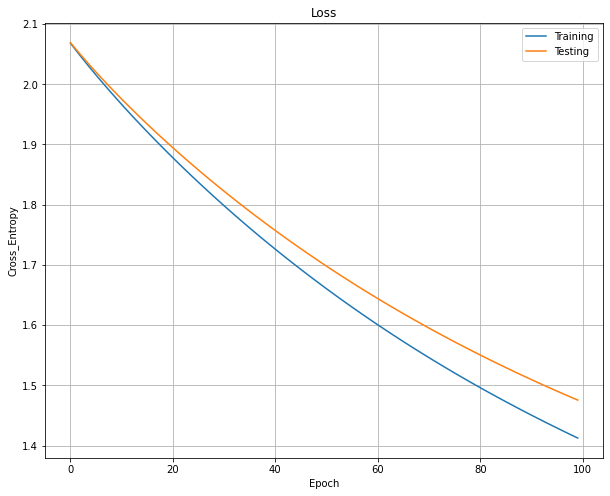

In [20]:
#weights = np.random.normal(0, 1, size = (8, 785))
weights = np.zeros(shape = (8, 784))
phi = Training
Loss = list()
Loss2 = list()
ACC = list()
ACC2 = list()
A = list()
for epoch in range(100):
    print('Epoch :',epoch, end = '  ')
    Y = list()
    for i in range(8):
        Y.append(softmax(weights = weights, Class = i, data = phi)) # softmax predcition
    for c in range(8):
        W = 0
        y = Y[c]
        label = (Train_Label == c) # One of the K
        G = gradient(phi ,label, y) # Gradient
        W = weights[c] - 0.01*G # Update the weights
        weights[c] = W
        
    Loss.append(LOSS(phi, weights, Train_Label))
    Loss2.append(LOSS(Testing, weights, Test_Label))
    ACC.append(np.sum(Classify(phi, weights)[1] == Train_Label)/phi.shape[0])
    ACC2.append(np.sum(Classify(Testing, weights)[1] == Test_Label)/Testing.shape[0])
    print('Train_Loss:', Loss[epoch], '---Test_Loss:', Loss2[epoch], end = '\n')
    
plt.figure(figsize = (10, 8))
plt.plot(Loss, label = 'Training')
plt.plot(Loss2, label = 'Testing')
plt.legend()
plt.ylabel('Cross_Entropy')
plt.xlabel('Epoch')
plt.title('Loss')
plt.grid()
plt.show()

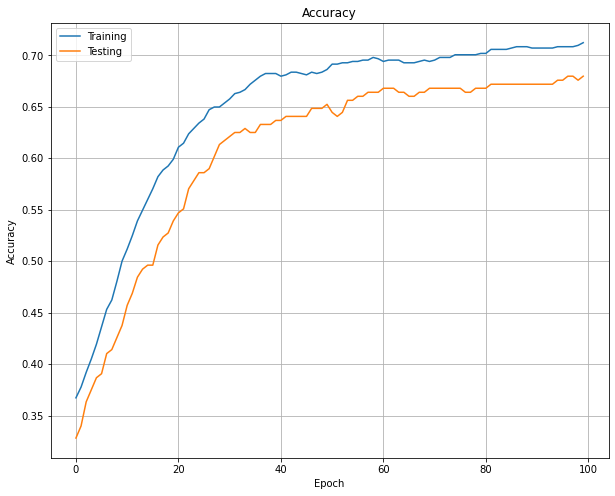

In [21]:
plt.figure(figsize = (10, 8))
plt.plot(ACC, label = 'Training')
plt.plot(ACC2, label = 'Testing')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.grid()
plt.show()

In [22]:
print('Training Accuracy :',ACC[-1])
print('Testing Accuracy : ',ACC2[-1])

Training Accuracy : 0.7122395833333334
Testing Accuracy :  0.6796875


In [23]:
print('Training Loss :',Loss[-1])
print('Testing Loss : ',Loss2[-1])

Training Loss : 1.4126734480786063
Testing Loss :  1.4756859607089354


### Mini Batch Gradient Descent

In [24]:
def taking_all_mini(I):
    Temp = I
    for i in range(1, 7):
        Temp = np.concatenate((Temp, I + (128 - 32)*i))
    return Temp

Epoch : 0  Train_Loss: 2.064162455885685 ---Test_Loss: 2.0654393236441995
Epoch : 1  Train_Loss: 2.0497136435727588 ---Test_Loss: 2.052324696532053
Epoch : 2  Train_Loss: 2.03760532083813 ---Test_Loss: 2.0411009473585198
Epoch : 3  Train_Loss: 2.0250708882390196 ---Test_Loss: 2.029133830480427
Epoch : 4  Train_Loss: 2.0155437443055493 ---Test_Loss: 2.0202048047105463
Epoch : 5  Train_Loss: 2.0049795794820238 ---Test_Loss: 2.010543398661178
Epoch : 6  Train_Loss: 1.9950508226268744 ---Test_Loss: 2.0016474025308457
Epoch : 7  Train_Loss: 1.9835476350455414 ---Test_Loss: 1.991313945464485
Epoch : 8  Train_Loss: 1.9734610721508439 ---Test_Loss: 1.9819992845890244
Epoch : 9  Train_Loss: 1.96368752943913 ---Test_Loss: 1.972565675873026
Epoch : 10  Train_Loss: 1.9537406818290746 ---Test_Loss: 1.9635302877472411
Epoch : 11  Train_Loss: 1.9444972747684632 ---Test_Loss: 1.954959225843244
Epoch : 12  Train_Loss: 1.9364544003947248 ---Test_Loss: 1.9475100662590188
Epoch : 13  Train_Loss: 1.9277075

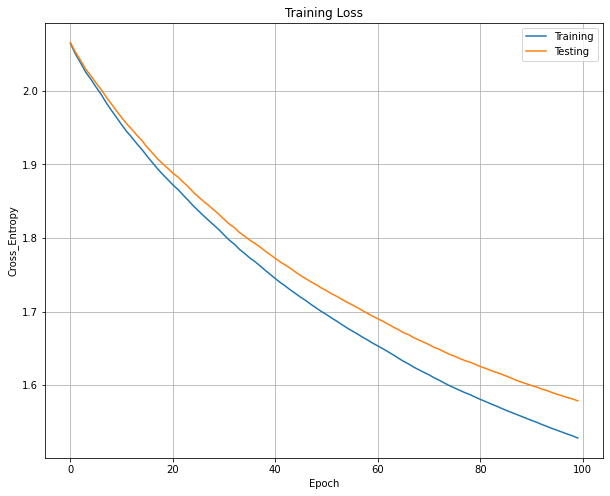

In [25]:
#weights = np.random.normal(0, 1, size = (8, 785))
weights = np.zeros(shape = (8, 784))
phi = Training
Loss = list()
Loss2 = list()
ACC = list()
ACC2 = list()
B = 8
for epoch in range(100):
    print('Epoch :',epoch, end = '  ')
    I = np.random.choice([i for i in range(Training.shape[0]//8)], Training.shape[0]//8, replace = False)
    Y = list()
    for i in range(8):
        Y.append(softmax(weights = weights, Class = i, data = phi)) # softmax predcition
    for c in range(8):
        W = 0
        for time in range(B):
            II = I[0 + I.shape[0]//B : I.shape[0]//B + I.shape[0]//B]
            III = taking_all_mini(II)
            phi_t = phi[III]
            y_t = Y[c][III] # softmax predcition
            label_t = (Train_Label[III] == c) # One of the K
            G = gradient(phi_t ,label_t, y_t) # Gradient
            W += weights[c] - 0.1*G/B # Update the weights
        weights[c] = W/B
    Loss.append(LOSS(phi, weights, Train_Label))
    Loss2.append(LOSS(Testing, weights, Test_Label))
    ACC.append(np.sum(Classify(phi, weights)[1] == Train_Label)/phi.shape[0])
    ACC2.append(np.sum(Classify(Testing, weights)[1] == Test_Label)/Testing.shape[0])
    print('Train_Loss:', Loss[epoch], '---Test_Loss:', Loss2[epoch], end = '\n')
    
plt.figure(figsize = (10, 8))
plt.plot(Loss, label = 'Training')
plt.plot(Loss2, label = 'Testing')
plt.legend()
plt.ylabel('Cross_Entropy')
plt.xlabel('Epoch')
plt.title('Training Loss')
plt.grid()
plt.show()

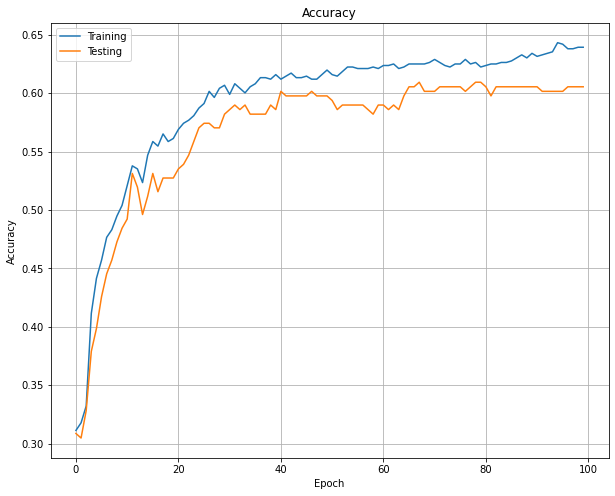

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(ACC, label = 'Training')
plt.plot(ACC2, label = 'Testing')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.grid()
plt.show()

In [27]:
print('Training Accuracy :',ACC[-1])
print('Testing Accuracy : ',ACC2[-1])

Training Accuracy : 0.6393229166666666
Testing Accuracy :  0.60546875


In [28]:
print('Training Loss :',Loss[-1])
print('Testing Loss : ',Loss2[-1])

Training Loss : 1.5280306551132536
Testing Loss :  1.5786306639748746


### Stochastic Gradient Descent

Epoch : 0  Train_Loss: 2.078704033313579 ---Test_Loss: 2.078757593780062
Epoch : 1  Train_Loss: 2.0779676182280054 ---Test_Loss: 2.07807472141289
Epoch : 2  Train_Loss: 2.0772322903001217 ---Test_Loss: 2.077392918640158
Epoch : 3  Train_Loss: 2.076498043455397 ---Test_Loss: 2.0767121795692365
Epoch : 4  Train_Loss: 2.075764871667379 ---Test_Loss: 2.076032498352678
Epoch : 5  Train_Loss: 2.0750327689573163 ---Test_Loss: 2.075353869187868
Epoch : 6  Train_Loss: 2.0743017293937807 ---Test_Loss: 2.0746762863166817
Epoch : 7  Train_Loss: 2.0735717470922927 ---Test_Loss: 2.073999744025135
Epoch : 8  Train_Loss: 2.0728428162149553 ---Test_Loss: 2.0733242366430495
Epoch : 9  Train_Loss: 2.07211493097008 ---Test_Loss: 2.0726497585437116
Epoch : 10  Train_Loss: 2.07138808561183 ---Test_Loss: 2.0719763041435404
Epoch : 11  Train_Loss: 2.0706622744398513 ---Test_Loss: 2.071303867901752
Epoch : 12  Train_Loss: 2.069937491798923 ---Test_Loss: 2.0706324443200335
Epoch : 13  Train_Loss: 2.069213732078

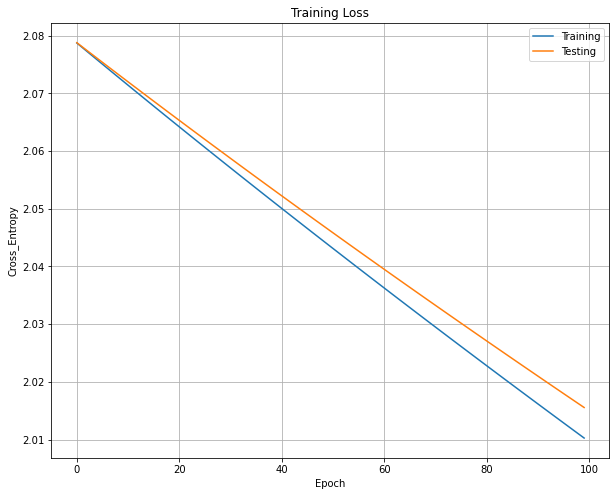

In [29]:
#weights = np.random.normal(0, 1, size = (8, 785))
weights = np.zeros(shape = (8, 784))
phi = Training
Loss = list()
Loss2 = list()
ACC = list()
ACC2 = list()
B = phi.shape[0]
for epoch in range(100):
    print('Epoch :',epoch, end = '  ')
    Y = list()
    for i in range(8):
        Y.append(softmax(weights = weights, Class = i, data = phi)) # softmax predcition
    for c in range(8):
        W = 0
        for time in range(phi.shape[0]):
            phi_t = phi[time:time+1]
            y_t = Y[c][time:time+1] # softmax predcition
            label_t = (Train_Label[time:time+1] == c) # One of the K
            G = gradient(phi_t ,label_t, y_t) # Gradient
            W += weights[c] - 0.5*G/B # Update the weights
        weights[c] = W/B
    Loss.append(LOSS(phi, weights, Train_Label))
    Loss2.append(LOSS(Testing, weights, Test_Label))
    ACC.append(np.sum(Classify(phi, weights)[1] == Train_Label)/phi.shape[0])
    ACC2.append(np.sum(Classify(Testing, weights)[1] == Test_Label)/Testing.shape[0])
    print('Train_Loss:', Loss[epoch], '---Test_Loss:', Loss2[epoch], end = '\n')
    
plt.figure(figsize = (10, 8))
plt.plot(Loss, label = 'Training')
plt.plot(Loss2, label = 'Testing')
plt.legend()
plt.ylabel('Cross_Entropy')
plt.xlabel('Epoch')
plt.title('Training Loss')
plt.grid()
plt.show()

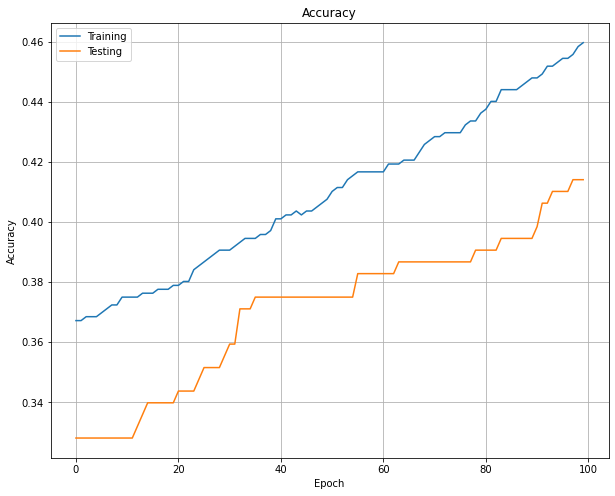

In [30]:
plt.figure(figsize = (10, 8))
plt.plot(ACC, label = 'Training')
plt.plot(ACC2, label = 'Testing')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.grid()
plt.show()

In [31]:
print('Training Accuracy :',ACC[-1])
print('Testing Accuracy : ',ACC2[-1])

Training Accuracy : 0.4596354166666667
Testing Accuracy :  0.4140625


In [32]:
print('Training Loss :',Loss[-1])
print('Testing Loss : ',Loss2[-1])

Training Loss : 2.0102768830046034
Testing Loss :  2.01556551710905


#### 

#### 

#### 

#### 

# Question 2 : Gaussian Process for Regression

### Read data and transform it into array

In [62]:
data2 = pd.read_csv("x.csv", header = None)
label2 = pd.read_csv("t.csv", header = None)

In [63]:
X_train = np.array(data2.iloc[:150]); Y_train = np.array(label2.iloc[:150])
X_test = np.array(data2.iloc[150:]); Y_test = np.array(label2.iloc[150:])

In [64]:
print(X_train.shape, X_test.shape)

(150, 1) (150, 1)


In [65]:
RMSE_TEST = list()

In [66]:
# Quick sort for list data-type, the time complexity is Big-Oh(logN)
def quicksort(data, left, right):
    if left >= right : # break condition
        return
    i = left; j = right # left is i, right is j
    key = data[left] # basis  
    while i != j:                  
        while data[j] > key and i < j: # Start from the right end, find the point which is smaller that basis
            j -= 1
        while data[i] <= key and i < j:  # Start from the right end, find the point which is bigger that basis
            i += 1
        if i < j:                        # if i and j not meet, switch!!
            data[i], data[j] = data[j], data[i] 

    # if i and j met
    data[left] = data[i] 
    data[i] = key
    # iteation -> divide and conquer
    quicksort(data, left, i-1)   # left side
    quicksort(data, i+1, right)  # right side

# -----------------------------------------------------------------------------------------

## Part1 (with Part3) : Construct a Kernel Function Using the Basis Functions

#### 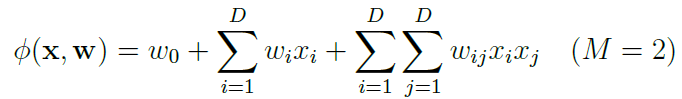

### 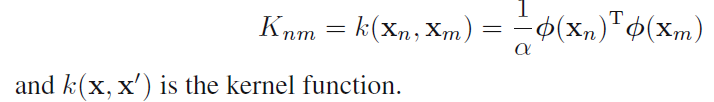

#### Consider the following formula:

#### 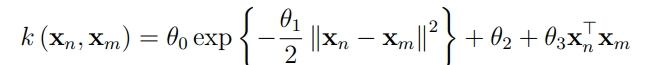

#### If we let theta 0, theta 1, theta 2 be zero, then it's the form of polynomial. For simplicity, I use the code in the part2 to modify

In [67]:
X1 = np.insert(X_train, 0, values = np.ones(shape = (X_train.shape[0])), axis = 1)
X_train = np.insert(X1, -1, values = (X_train**2).reshape((-1,)), axis = 1)
X1 = np.insert(X_test, 0, values = np.ones(shape = (X_test.shape[0])), axis = 1)
X_test = np.insert(X1, -1, values = (X_test**2).reshape((-1,)), axis = 1)
del X1
print(X_train.shape, X_test.shape)

(150, 3) (150, 3)


In [68]:
I = np.identity(150)
Expand_I = np.zeros(150*150)
for i in range(150):
    for j in range(150):
        Expand_I[i*150 + j] = I[i][j]

In [69]:
theta = np.array([[0, 0, 0, 1], [1, 8, 0, 0], [1, 1, 0, 16], [1, 1, 32, 0]])
#linear kernel
#squared exponential kernel
#exponential-quadratic kernel
#exponential-quadratic kernel
Graphs = ['linear kernel', 'squared exponential kernel', 'exponential-quadratic kernel', 'exponential-quadratic kernel']
theta

array([[ 0,  0,  0,  1],
       [ 1,  8,  0,  0],
       [ 1,  1,  0, 16],
       [ 1,  1, 32,  0]])

In [70]:
K = list()
C = list()
for i in range(4):
    k = np.zeros(shape = (150, 150))
    c = np.zeros(shape = (150, 150))
    for n in range(150):
        for m in range(150):
            inner = (-1/2)*theta[i][1]*(X_train[n] - X_train[m]).T@(X_train[n] - X_train[m])
            outer = theta[i][2] + theta[i][3]*X_train[n].T@X_train[m]
            k[n][m] = theta[i][0]*np.exp(inner) + outer
            c[n][m] = k[n][m]
    K.append(list(k))
    C.append(list(c))
K = np.array(K)
C = np.array(C)
for i in range(4):
    C[i] = C[i] + I

In [71]:
C1 = np.zeros(shape = (4, 150)); Mean1 = np.zeros(shape = (4, 150)); Sigma1 = np.zeros(shape = (4, 150)); ERMS = np.zeros(shape = (4, ))
# Assign four different types of kernel function
for TYPE in range(4):
    for obj in range(150):
        # Coompute the value of K1 by the formula provided above.
        K1 = np.zeros(shape = (150))
        for process in range(150):
            inner = (-1/2)*theta[TYPE][1]*(X_test[obj] - X_train[process]).T@(X_test[obj] - X_train[process])
            outer = theta[TYPE][2] + theta[TYPE][3]*X_test[obj].T@X_train[process]
            K1[process] = theta[TYPE][0]*np.exp(inner) + outer
        inner = (-1/2)*theta[TYPE][1]*(X_test[obj] - X_test[obj]).T@(X_test[obj] - X_test[obj])
        outer = theta[TYPE][2] + theta[TYPE][3]*X_test[obj].T@X_test[obj] + 1
        C1[TYPE][obj] = theta[TYPE][0]*np.exp(inner) + outer
        Mean1[TYPE][obj] = (K1.T@np.linalg.inv(C[TYPE]))@Y_train
        Sigma1[TYPE][obj] = C1[TYPE][obj] - K1.T@np.linalg.inv(C[TYPE])@K1
    # Compute Each Kernel Type's error.

In [72]:
RMSE_TEST.append(ERMS[0])

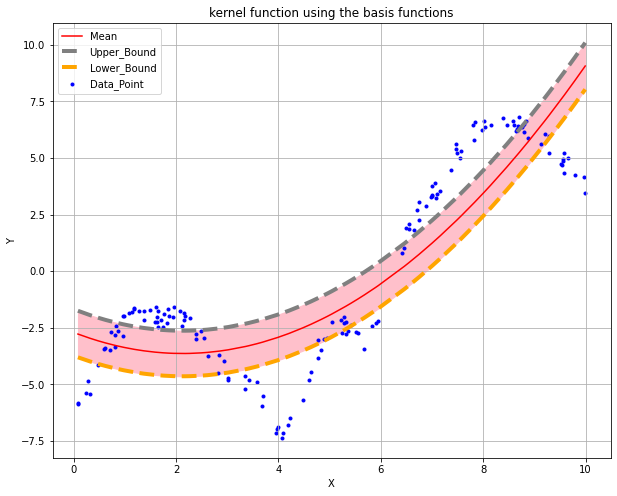

In [73]:
OXT = np.array(data2.iloc[150:]); OYT = np.array(label2.iloc[150:])
for graph in range(1):
    plt.figure(figsize = (10, 8))
    plt.title('kernel function using the basis functions')
    result = OXT.reshape(-1,).tolist().copy()
    quicksort(result,0, len(result) - 1)
    A = OXT.T.copy()
    quicksort(A[0], 0, len(A) - 1)
    sorted_index = np.argsort(X_test[:,1].T).T
    plt.plot(result, Mean1[graph][sorted_index], color = 'red', label = 'Mean')
    plt.plot(result, Mean1[graph][sorted_index] + (Sigma1[graph][sorted_index])**(1/2), color = 'gray', linewidth = 4,linestyle = '--',label = 'Upper_Bound')
    plt.plot(result, Mean1[graph][sorted_index] - (Sigma1[graph][sorted_index])**(1/2), color = 'orange', linewidth = 4,linestyle = '--', label = 'Lower_Bound')
    UP = (Mean1[graph][sorted_index] + (Sigma1[graph][sorted_index])**(1/2)).reshape((-1, ))
    DOWN = (Mean1[graph][sorted_index] - (Sigma1[graph][sorted_index])**(1/2)).reshape((-1, ))
    plt.fill_between(result, DOWN, UP, color = 'pink')
    plt.scatter(A.T, OYT.T, label = 'Data_Point', color = 'blue', marker = '.')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

#### by the formula

#### 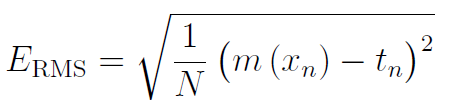

In [74]:
TEMP = np.zeros((150, ))
i = 0
for n in range(150):
    Kernel_train = np.zeros((150, ))
    for m in range(150):
        inner = (-1/2)*theta[i][1]*(X_train[n] - X_train[m]).T@(X_train[n] - X_train[m])
        outer = theta[i][2] + theta[i][3]*X_train[n].T@X_train[m]
        Kernel_train[m] = theta[i][0]*np.exp(inner) + outer
    TEMP[n] = (Kernel_train.T@(np.linalg.inv(C[i])))@(Y_train) 

In [75]:
print('Training RMSE:',(np.mean((TEMP - Y_train.reshape((-1, )))**2))**(1/2))
print('Testing RMSE: ', (np.mean((Mean1[0] - Y_test.reshape((-1, )))**2))**(1/2))

Training RMSE: 2.066356298176963
Testing RMSE:  2.0971349005111493


# -----------------------------------------------------------------------------------------

## Part2 (with Part3) : Using Exponential-Quadratic Kernel Function and Use Theta as the Homework Description

#### Renew the data

In [76]:
X_train = np.array(data2.iloc[:150]); Y_train = np.array(label2.iloc[:150])
X_test = np.array(data2.iloc[150:]); Y_test = np.array(label2.iloc[150:])

In [77]:
theta = np.array([[0, 0, 0, 1], [1, 8, 0, 0], [1, 1, 0, 16], [1, 1, 32, 0]])
#linear kernel
#squared exponential kernel
#exponential-quadratic kernel
#exponential-quadratic kernel
Graphs = ['linear kernel', 'squared exponential kernel', 'exponential-quadratic kernel', 'exponential-quadratic kernel']
theta

array([[ 0,  0,  0,  1],
       [ 1,  8,  0,  0],
       [ 1,  1,  0, 16],
       [ 1,  1, 32,  0]])

In [78]:
I = np.identity(150)
Expand_I = np.zeros(150*150)
for i in range(150):
    for j in range(150):
        Expand_I[i*150 + j] = I[i][j]

#### Recall the Kernel function

#### 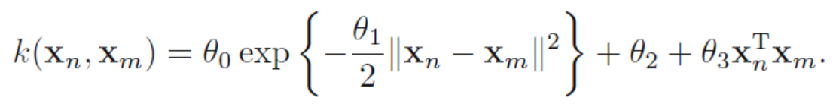

####  Covariance Matrix

#### 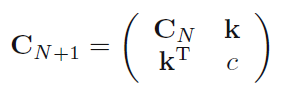

#### Big C and small c are different

#### 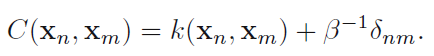

#### vector k has elements k(xn, xN+1) for n = 1, . . . , N, and the scalar

#### 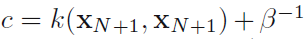

In [79]:
K = list()
C = list()
for i in range(4):
    k = np.zeros(shape = (150, 150))
    c = np.zeros(shape = (150, 150))
    for n in range(150):
        for m in range(150):
            inner = (-1/2)*theta[i][1]*(X_train[n] - X_train[m]).T@(X_train[n] - X_train[m])
            outer = theta[i][2] + theta[i][3]*X_train[n].T@X_train[m]
            k[n][m] = theta[i][0]*np.exp(inner) + outer
            c[n][m] = k[n][m]
    K.append(list(k))
    C.append(list(c))
K = np.array(K)
C = np.array(C)
for i in range(4):
    C[i] = C[i] + I

#### Kernel Function

#### 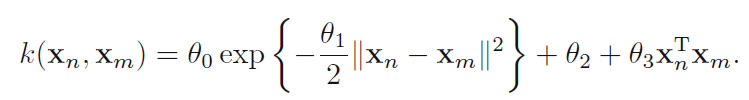

#### Gaussian Distribution Mean and Varaince

#### 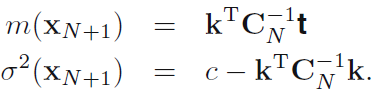

#### The Rooted Mean Square Error is provided in the homework description

#### 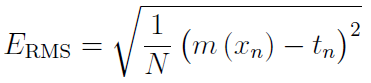

In [80]:
C1 = np.zeros(shape = (4, 150)); Mean1 = np.zeros(shape = (4, 150)); Sigma1 = np.zeros(shape = (4, 150)); ERMS = np.zeros(shape = (4, ))
# Assign four different types of kernel function
for TYPE in range(4):
    for obj in range(150):
        # Coompute the value of K1 by the formula provided above.
        K1 = np.zeros(shape = (150))
        for process in range(150):
            inner = (-1/2)*theta[TYPE][1]*(X_test[obj] - X_train[process]).T@(X_test[obj] - X_train[process])
            outer = theta[TYPE][2] + theta[TYPE][3]*X_test[obj].T@X_train[process]
            K1[process] = theta[TYPE][0]*np.exp(inner) + outer
        inner = (-1/2)*theta[TYPE][1]*(X_test[obj] - X_test[obj]).T@(X_test[obj] - X_test[obj])
        outer = theta[TYPE][2] + theta[TYPE][3]*X_test[obj].T@X_test[obj] + 1
        C1[TYPE][obj] = theta[TYPE][0]*np.exp(inner) + outer
        Mean1[TYPE][obj] = (K1.T@np.linalg.inv(C[TYPE]))@Y_train
        Sigma1[TYPE][obj] = C1[TYPE][obj] - K1.T@np.linalg.inv(C[TYPE])@K1
    # Compute Each Kernel Type's error.
    ERMS[TYPE] = np.mean((Mean1[TYPE]-Y_test.T.reshape((-1, )))**2)**(1/2)

In [81]:
RMSE_TEST.append(ERMS)

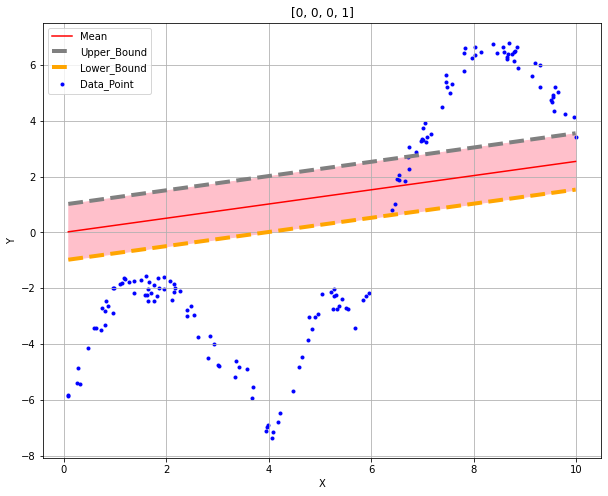

----------------------------------------------END-----------------------------------------------------------


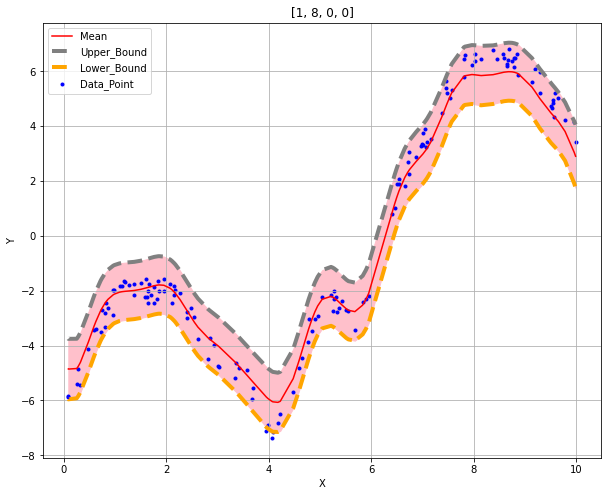

----------------------------------------------END-----------------------------------------------------------


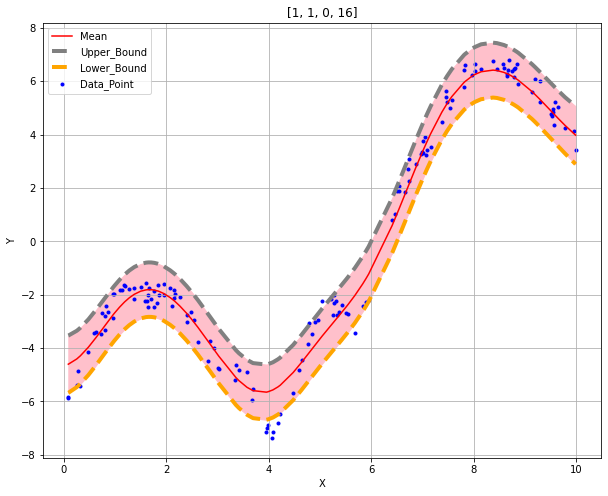

----------------------------------------------END-----------------------------------------------------------


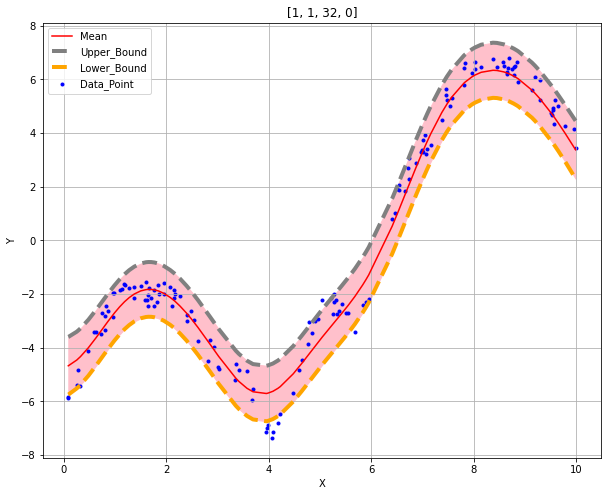

In [82]:
for graph in range(4):
    plt.figure(figsize = (10, 8))
    plt.title(list(theta[graph]))
    result = X_test.reshape(-1,).tolist().copy()
    quicksort(result,0, len(result) - 1)
    A = X_test.T.copy()
    quicksort(A[0], 0, len(A) - 1)
    sorted_index = np.argsort(X_test.T).T
    plt.plot(result, Mean1[graph][sorted_index], color = 'red', label = 'Mean')
    plt.plot(result, Mean1[graph][sorted_index] + (Sigma1[graph][sorted_index])**(1/2), color = 'gray', linewidth = 4,linestyle = '--',label = 'Upper_Bound')
    plt.plot(result, Mean1[graph][sorted_index] - (Sigma1[graph][sorted_index])**(1/2), color = 'orange', linewidth = 4,linestyle = '--', label = 'Lower_Bound')
    UP = (Mean1[graph][sorted_index] + (Sigma1[graph][sorted_index])**(1/2)).reshape((-1, ))
    DOWN = (Mean1[graph][sorted_index] - (Sigma1[graph][sorted_index])**(1/2)).reshape((-1, ))
    plt.fill_between(result, DOWN, UP, color = 'pink')
    plt.scatter(A.T, Y_test.T, label = 'Data_Point', color = 'blue', marker = '.')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()
    if graph != 3:
        print('----------------------------------------------END-----------------------------------------------------------')

## Part4 : Show the Rooted Mean Squared Errors

In [83]:
TEMP = np.zeros((4, 150))
for i in range(4):
    for n in range(150):
        Kernel_train = np.zeros((150, ))
        for m in range(150):
            inner = (-1/2)*theta[i][1]*(X_train[n] - X_train[m]).T@(X_train[n] - X_train[m])
            outer = theta[i][2] + theta[i][3]*X_train[n].T@X_train[m]
            Kernel_train[m] = theta[i][0]*np.exp(inner) + outer
        TEMP[i][n] = (Kernel_train.T@(np.linalg.inv(C[i])))@(Y_train) 

In [84]:
for i in range(4):
    print('Condition on theta is',list(theta[i]))
    print('Training RMSE:',(np.mean((TEMP[i] - Y_train.reshape((-1, )))**2))**(1/2))
    print('Testing RMSE :',ERMS[i])
    print('-------------------------------------------------------------------------------')

Condition on theta is [0, 0, 0, 1]
Training RMSE: 4.082716846775788
Testing RMSE : 3.9326169919139127
-------------------------------------------------------------------------------
Condition on theta is [1, 8, 0, 0]
Training RMSE: 0.46961784610996815
Testing RMSE : 0.4930274558233141
-------------------------------------------------------------------------------
Condition on theta is [1, 1, 0, 16]
Training RMSE: 0.6044969015600926
Testing RMSE : 0.5809786110397477
-------------------------------------------------------------------------------
Condition on theta is [1, 1, 32, 0]
Training RMSE: 0.602490245184949
Testing RMSE : 0.5866270617532613
-------------------------------------------------------------------------------


# -----------------------------------------------------------------------------------------

## Part5  : tune the hyperparameters θ by Automatic relevance determination (ARD)

#### Assume the Automatic Revelance Determination of K, C, c, mean, sigma, RMSE

In [56]:
ARD_K = np.zeros(shape = (150, 150))
ARD_C = np.zeros(shape = (150, 150))
ARD_c_Train = np.zeros(shape = (150, ))
ARD_c_Test = np.zeros(shape = (150, ))
ARD_Mean_Train = np.zeros(shape = (150, ))
ARD_Mean_Test = np.zeros(shape = (150, ))
ARD_Sigma_Train = np.zeros(shape = (150, ))
ARD_Sigma_Test = np.zeros(shape = (150, ))
ARD_RMSE_Train = list()
ARD_RMSE_Test = list()

In [57]:
I = np.identity(150)

In [58]:
theta1 = np.zeros(shape = (150,150))
theta2 = np.zeros(shape = (150,150))
theta3 = np.zeros(shape = (150,150))
theta4 = np.zeros(shape = (150,150))

In [59]:
def update_theta(theta1, theta2, theta3, theta4, Theta, X_train, Y_train, ARD_C):
    for n in range(150):
        for m in range(150):
            theta1[n][m] = np.exp((-1/2)*Theta[1]*(X_train[n] - X_train[m]).T@(X_train[n] - X_train[m]))
            right = np.exp((-1/2)*Theta[1]*(X_train[n] - X_train[m]).T@(X_train[n]- X_train[m]))
            theta2[n][m] = (-1/2)*Theta[0]*(X_train[n] - X_train[m]).T@(X_train[n] - X_train[m])*right
            theta3[n][m] = np.ones(shape = (1, ))
            theta4[n][m] = X_train[n].T@X_train[m]
    update1 = (-1/2)*(theta1@(np.linalg.inv(ARD_C))).trace() + (1/2)*(((Y_train.T@(np.linalg.inv(ARD_C)))@theta1)@(np.linalg.inv(ARD_C)))@Y_train
    update2 = (-1/2)*(theta2@(np.linalg.inv(ARD_C))).trace() + (1/2)*(((Y_train.T@(np.linalg.inv(ARD_C)))@theta2)@(np.linalg.inv(ARD_C)))@Y_train
    update3 = (-1/2)*(theta3@(np.linalg.inv(ARD_C))).trace() + (1/2)*(((Y_train.T@(np.linalg.inv(ARD_C)))@theta3)@(np.linalg.inv(ARD_C)))@Y_train
    update4 = (-1/2)*(theta4@(np.linalg.inv(ARD_C))).trace() + (1/2)*(((Y_train.T@(np.linalg.inv(ARD_C)))@theta4)@(np.linalg.inv(ARD_C)))@Y_train
    Theta[0] = Theta[0] + 0.01*update1
    Theta[1] = Theta[1] + 0.01*update2
    Theta[2] = Theta[2] + 0.01*update3
    Theta[3] = Theta[3] + 0.01*update4

In [60]:
ARD_theta = [1,  1,  0, 16]
eta = 0.01
early_stopping = 0
for epoch in range(100):
    for n in range(150):
        for m in range(150):
            inner = (-1/2)*ARD_theta[1]*(X_train[n] - X_train[m]).T@(X_train[n] - X_train[m])
            outer = ARD_theta[2] + ARD_theta[3]*X_train[n].T@X_train[m]
            ARD_K[n][m] = ARD_theta[0]*np.exp(inner) + outer
            ARD_C[n][m] = ARD_K[n][m]
    ARD_C = ARD_C + I
    
    for n in range(150):
        ARD_K1 = np.zeros(shape = (150, ))
        for m in range(150):
            inner = (-1/2)*ARD_theta[1]*(X_test[n] - X_train[m]).T@(X_test[n] - X_train[m])
            outer = ARD_theta[2] + ARD_theta[3]*X_test[n].T@X_train[m]
            ARD_K1[m] = ARD_theta[0]*np.exp(inner) + outer
        inner = (-1/2)*ARD_theta[1]*(X_test[n] - X_test[n]).T@(X_test[n] - X_test[n])
        outer = ARD_theta[2] + ARD_theta[3]*X_test[n].T@X_test[n] + 1
        ARD_c_Test[n] = ARD_theta[0]*np.exp(inner) + outer
        ARD_Mean_Test[n] = (ARD_K1.T@(np.linalg.inv(ARD_C)))@Y_train
        ARD_Sigma_Test[n] = ARD_c_Test[n] - (ARD_K1.T@(np.linalg.inv(ARD_C)))@(ARD_K1)
    Test_Loss = np.mean((ARD_Mean_Test - Y_test.reshape((-1, )))**2)**(1/2)


    TEMP = np.zeros((150, ))
    for n in range(150):
        Kernel_train = np.zeros((150, ))
        for m in range(150):
            inner = (-1/2)*ARD_theta[1]*(X_train[n] - X_train[m]).T@(X_train[n] - X_train[m])
            outer = ARD_theta[2] + ARD_theta[3]*X_train[n].T@X_train[m]
            Kernel_train[m] = ARD_theta[0]*np.exp(inner) + outer
        TEMP[n] = (Kernel_train.T@(np.linalg.inv(ARD_C)))@(Y_train)  
    Train_Loss = (np.mean((TEMP - Y_train.reshape((-1, )))**2))**(1/2)
    ARD_RMSE_Train.append(Train_Loss)
    ARD_RMSE_Test.append(Test_Loss)
    print('Epoch', epoch,'Training Loss :', Train_Loss, '--Testing Loss :', Test_Loss)
    try:
        diff = ARD_RMSE_Train[epoch - 1] - ARD_RMSE_Train[epoch]
    except:
        diff = float('inf')
    update_theta(theta1, theta2, theta3, theta4, ARD_theta, X_train, Y_train, ARD_C)
    if (diff < 0) and early_stopping == 0:
        early_stopping += 1
    elif (diff < 0) and early_stopping != 0:
        early_stopping += 1
    elif early_stopping == 5:
        break
    else:
        early_stopping == 0
        

Epoch 0 Training Loss : 0.6044969015600926 --Testing Loss : 0.5809786110397477
Epoch 1 Training Loss : 0.5663547023997336 --Testing Loss : 0.5507106796687212
Epoch 2 Training Loss : 0.5556758591163957 --Testing Loss : 0.540571667358409
Epoch 3 Training Loss : 0.5461487814420243 --Testing Loss : 0.5312180569049052
Epoch 4 Training Loss : 0.5370992658320538 --Testing Loss : 0.5222201822763628
Epoch 5 Training Loss : 0.5283744335541892 --Testing Loss : 0.5135322722224679
Epoch 6 Training Loss : 0.5199637849805806 --Testing Loss : 0.5052009144331578
Epoch 7 Training Loss : 0.5118886698200227 --Testing Loss : 0.49727713613507735
Epoch 8 Training Loss : 0.5041631990367257 --Testing Loss : 0.4897869276122481
Epoch 9 Training Loss : 0.4967839456444388 --Testing Loss : 0.4827272105409831
Epoch 10 Training Loss : 0.4897318978198454 --Testing Loss : 0.4760725470067418
Epoch 11 Training Loss : 0.4829782810704218 --Testing Loss : 0.46978442190686404
Epoch 12 Training Loss : 0.47649028892568995 --Te

#### Tune後的Theta結果如下：【由上而下是theta0, theta1, theta2, theta3, theta4】

In [61]:
ARD_theta

[array([[4.20374886]]),
 array([[2.20939453]]),
 array([[2.4199608]]),
 array([[15.96976453]])]